In [10]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output

# How easy it is to work with our data?

If you need any data you just have to use lakey client, it's super easy. 

First you must install it:

```bash
pip install lakey-client
```

and than simply use it:

```python
from lakey_client import LakeyClient

lakey = LakeyClient()
```

Now you're ready to merge yourself into the world of lakey data

In [11]:
from lakey_client import LakeyClient

lakey = LakeyClient()

# How to discover out data?

If you need to discover some data just run:

```python
lakey.discover()
```

In [12]:
lakey.discover()

# Downloding data for the super important iot device 0

It's so simple:

```python
df = lakey.download(id='iot-0')
```

How many records do we have?

In [15]:
df = lakey.download(id='iot-0')
clear_output()

df.value.count()

177902

How does out data look like?

In [16]:
df.head()

,timestamp_client,property,value,source,year,month,day
0,2019-01-15T12:55:30.000Z,heating.circuits.0.sensors.temperature.supply/...,47.0,hg,2019,1,15
1,2019-01-15T07:59:08.000Z,heating.circuits.0.sensors.temperature.supply/...,56.0,hg,2019,1,15
2,2019-01-15T12:56:51.000Z,heating.circuits.0.sensors.temperature.supply/...,46.0,hg,2019,1,15
3,2019-01-15T08:00:29.000Z,heating.circuits.0.sensors.temperature.supply/...,55.0,hg,2019,1,15
4,2019-01-15T12:57:42.000Z,heating.circuits.0.sensors.temperature.supply/...,45.0,hg,2019,1,15


In [17]:
df.timestamp_client = pd.to_datetime(df.timestamp_client, infer_datetime_format=True)

What is the distribution of events with respect to various properties?

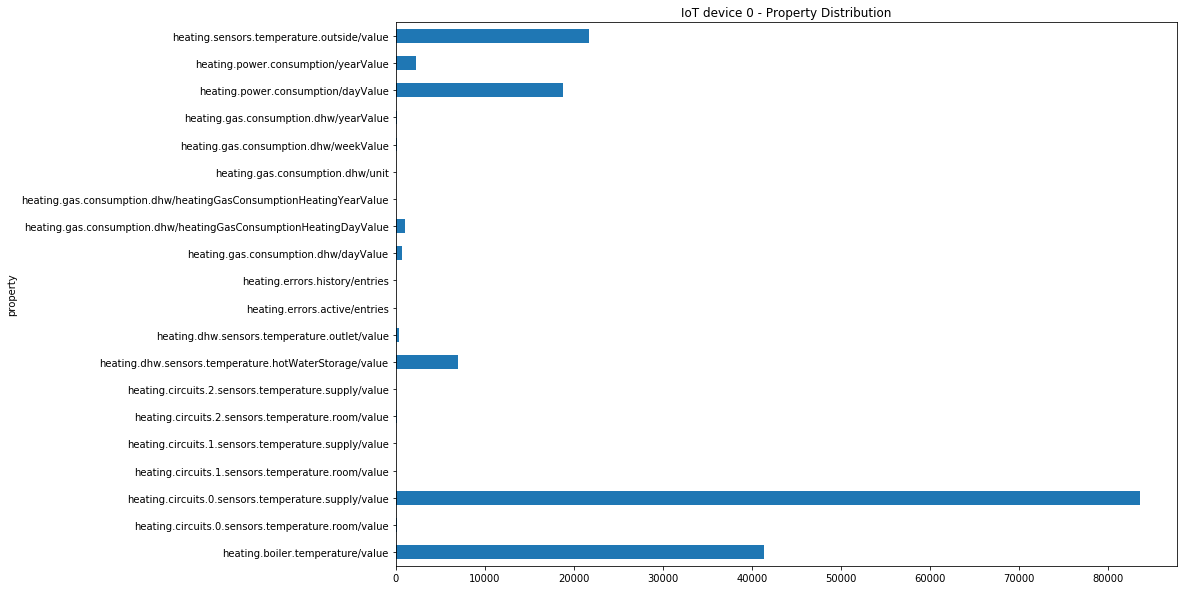

In [19]:
_ = df.groupby('property').count().day.plot(
    kind='barh',
    title='IoT device 0 - Property Distribution',
    figsize=(14, 10))

How does the plot of outside temperatures look like? Was the winter cold? 

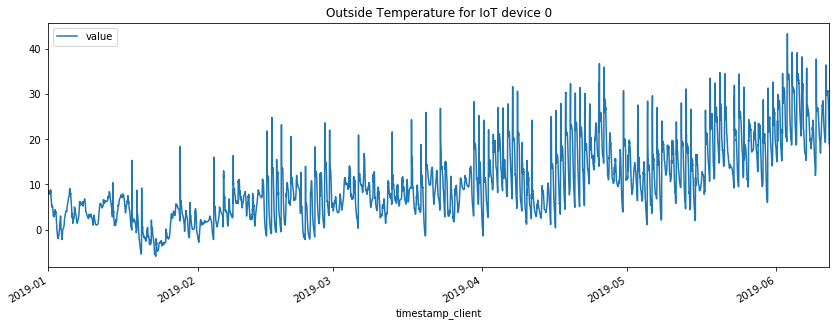

In [35]:
outside_temp_df = df[df['property'] == 'heating.sensors.temperature.outside/value']
outside_temp_df.value = outside_temp_df.value.astype(float)

_ = outside_temp_df.plot(
    title='Outside Temperature for IoT device 0',
    x='timestamp_client', 
    y='value', 
    figsize=(14, 5))